In [7]:
import numpy as np
import matplotlib.pyplot as plt

nx = 100
ny = 100


Tipo_Cond = [0,0,0,1]  #0 para temperatura, 1 para flujo de calor
Cond_contor = [75,100,50,0]
#  [izquierda, arriba, derecha, abajo]



n = nx * ny
beta = nx/ny 


Matriz = np.eye(n,n)
Vector_B = np.zeros(n)


In [8]:

for i in range (1,nx-1):
    for j in range (1,ny-1):
        k = i + j * nx
        Matriz[k,k] = -2 * (beta**2 + 1) 
        Matriz[k,k+nx] = beta**2
        Matriz[k,k-nx] = beta**2
        Matriz[k,k-1] = 1
        Matriz[k,k+1] = 1


In [9]:
esquinas = np.zeros(4)
esquinas[0] = 0
esquinas[1] = nx-1
esquinas[2] = (ny-1)*nx
esquinas[3] = (nx-1) + (ny-1)*nx

In [10]:
Ta = Cond_contor [0] #izquierda
Tb = Cond_contor[1] #arriba
Tc = Cond_contor [2] #derecha
Td = Cond_contor [3] #abajo


T_prod1 = (Ta+Td)/2
T_prod2 = (Ta+Tb)/2
T_prod3 = (Tc+Tb)/2
T_prod4 = (Tc+Td)/2
T_prom = [T_prod1,T_prod2,T_prod3,T_prod4]

l = 0

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        if i == 0 and 0<j<ny-1:
            Vector_B[k] = Ta
        elif i == nx-1 and 0<j<ny-1:         
            Vector_B[k] = Tc
        elif 0<i<nx-1 and j == 0:
            Vector_B[k] = Td
        elif 0<i<nx-1 and j == ny-1:
            Vector_B[k] = Tb            
        
        if k in esquinas:
            Vector_B[k] = T_prom[l]
            l += 1
            
            
print(Vector_B)

[ 37.5   0.    0.  ... 100.  100.   25. ]


[[ 37.5         75.          75.         ...  75.          75.
   87.5       ]
 [  0.          37.50837435  52.34070375 ...  82.53076324  87.48604275
  100.        ]
 [  0.          22.69279364  37.53349738 ...  87.44417104  92.41340778
  100.        ]
 ...
 [  0.          15.14527877  25.05582896 ...  74.96650262  84.86589291
  100.        ]
 [  0.          25.01395725  34.91055022 ...  65.1006097   74.99162565
  100.        ]
 [ 75.          50.          50.         ...  50.          50.
   25.        ]]


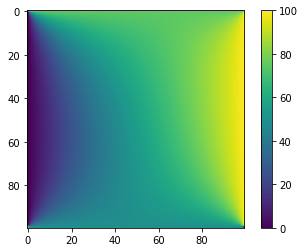

In [12]:
T = np.linalg.solve(Matriz,Vector_B)
Matriz_Temp = np.zeros([nx,ny])

for i in range (0,nx):
    for j in range (0,ny):
        k = i + j * nx
        Matriz_Temp[i,j] = T[k]
        
print(Matriz_Temp)
plt.imshow(Matriz_Temp)
plt.colorbar()